# t-SNE visualization of CIFAR-100 models

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

from mdistiller.models import cifar_model_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# visualize t-SNE
def get_tsne(stu, mpath):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu
    cfg.DATASET.TYPE = 'cifar100'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cifar_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


157it [01:05,  2.40it/s]


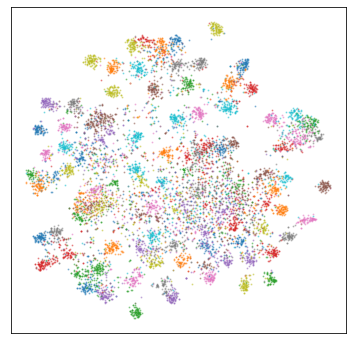

In [3]:
# KD baseline
mpath = "../../download_ckpts/kd_resnet8x4"
get_tsne("resnet8x4", mpath)

Files already downloaded and verified
Files already downloaded and verified


157it [01:05,  2.40it/s]


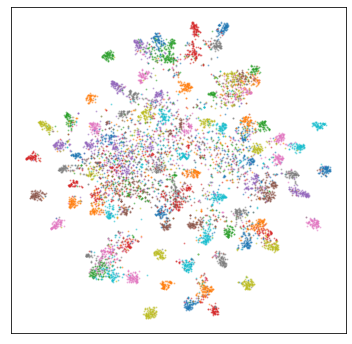

In [4]:
# Our DKD
mpath = "../../download_ckpts/dkd_resnet8x4"
get_tsne("resnet8x4", mpath)

# t-SNE visualization of CUB-200 models

In [11]:
# python eval.py \
#   --model ShuffleV1 \
#   --ckpt ./output/cub200_baselines_gamma2/CD_SDD_KD,res32x4_sdd,shuv1_sdd/student_best \
#   --dataset cub200  # Top-1:65.878| Top-5:86.918
# python eval.py \
#   --model ShuffleV1 \
#   --ckpt ./output/cub200_baselines_gamma2/KD,res32x4_sdd,shuv1_sdd/student_best \
#   --dataset cub200  # Top-1:65.878| Top-5:86.918

In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

from mdistiller.models import cub_model_dict
from mdistiller.dataset import get_dataset
from mdistiller.engine.utils import load_checkpoint
from mdistiller.engine.cfg import CFG as cfg
from train_origin import modify_student_model_for_cub200

In [9]:
# visualize t-SNE
def get_tsne(stu, mpath, name):
    cfg.defrost()
    cfg.DISTILLER.STUDENT = stu + '_sdd'
    cfg.DATASET.TYPE = 'cub200'
    cfg.freeze()
    train_loader, val_loader, num_data, num_classes = get_dataset(cfg)
    model = cub_model_dict[cfg.DISTILLER.STUDENT][0](num_classes=num_classes)
    model = modify_student_model_for_cub200(model, cfg, n_cls=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    print(model)
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes, name)

def plot_features(features, labels, num_classes, name):
    colors = ['C' + str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(name + ".png", dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

[1, 2, 4]
ShuffleNet_SDD(
  (conv1): Conv2d(3, 24, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(24, 54, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shuffle1): ShuffleBlock()
      (conv2): Conv2d(54, 54, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=54, bias=False)
      (bn2): BatchNorm2d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(54, 216, kernel_size=(1, 1), stride=(1, 1), groups=3, bias=False)
      (bn3): BatchNorm2d(216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): AvgPool2d(kernel_size=3, stride=2, padding=1)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(240, 60, kernel_size=(1,

182it [04:29,  1.48s/it]


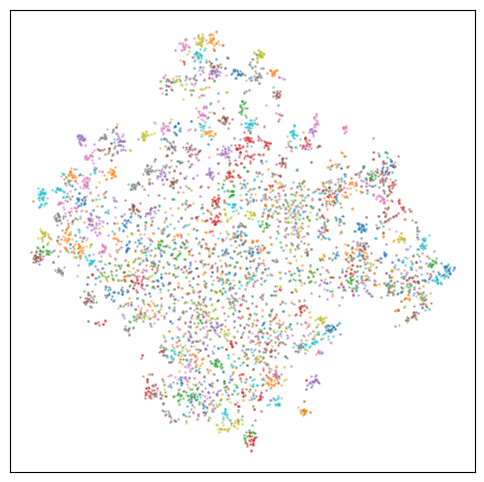

In [10]:
# KD baseline
mpath = "./output/cub200_baselines_gamma2/KD,res32x4_sdd,shuv1_sdd/student_best"
get_tsne("ShuffleV1", mpath, 'KD')

[1, 2, 4]
ShuffleNet_SDD(
  (conv1): Conv2d(3, 24, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(24, 54, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shuffle1): ShuffleBlock()
      (conv2): Conv2d(54, 54, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=54, bias=False)
      (bn2): BatchNorm2d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(54, 216, kernel_size=(1, 1), stride=(1, 1), groups=3, bias=False)
      (bn3): BatchNorm2d(216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): AvgPool2d(kernel_size=3, stride=2, padding=1)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(240, 60, kernel_size=(1,

182it [04:28,  1.47s/it]


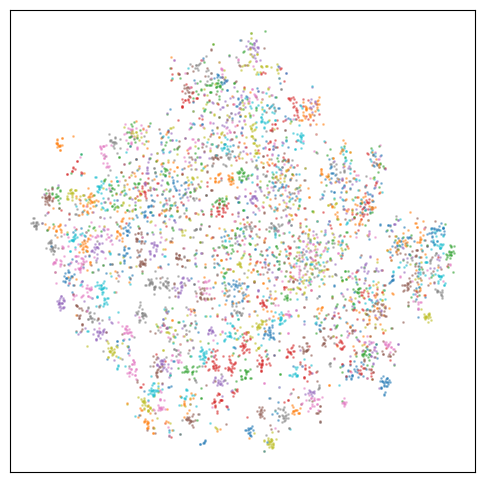

In [11]:
mpath = "./output/cub200_baselines_gamma2/CD_SDD_KD,res32x4_sdd,shuv1_sdd/student_best"
get_tsne("ShuffleV1", mpath, 'CD')